In [2]:
import sys
sys.path.append('../')

In [3]:
from aeml.models.tcn_dropout import TCNDropout

/home/kjablonk/anaconda3/envs/aeml/lib/python3.8/site-packages/darts/timeseries.py:39: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.DatetimeIndex, pd.RangeIndex, pd.Int64Index)
/home/kjablonk/anaconda3/envs/aeml/lib/python3.8/site-packages/darts/timeseries.py:512: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  times: Union[pd.DatetimeIndex, pd.Int64Index],
/home/kjablonk/anaconda3/envs/aeml/lib/python3.8/site-packages/darts/timeseries.py:738: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  def time_index(self) -> Union[pd.DatetimeIndex, pd.Int64Index]:
/home/kjablonk/anaconda3/envs/aeml/lib/python3.8/site-packages/darts/timeseries.py:2947: Fut

In [4]:
import joblib

In [5]:
TARGETS_clean = [
    "2-Amino-2-methylpropanol C4H11NO",
    "Piperazine C4H10N2",
]  # ['Piperazine C4H10N2'] #'2-Amino-2-methylpropanol C4H11NO',


In [6]:
m = joblib.load(f'/home/kjablonk/documents/aeml/scratch/20220303-114151_2-Amino-2-methylpropanol C4H11NO_model_reduced_feature_set')
#m2 = joblib.load('20220119_Piperazine C4H10N2_model')
#m3 = joblib.load('20220119_Carbon dioxide CO2_model')
#m4 = joblib.load('20220120_Ammonia NH3_model')

In [7]:
m.save_model(f'/home/kjablonk/documents/aeml/scratch/20220303-114151_2-Amino-2-methylpropanol C4H11NO_model_reduced_feature_set.pth.tar')

In [15]:
model_cov = TCNModelDropout(
    input_chunk_length=8,
    output_chunk_length=1,
    num_layers=5,
    num_filters=16,
    kernel_size=6,
    dropout=0.3,
    weight_norm=True,
    batch_size=32,
    n_epochs=100,
    log_tensorboard=True,
    optimizer_kwargs={"lr": 2e-4},
)

/home/kjablonk/anaconda3/envs/timeseries_analysis/lib/python3.8/site-packages/torch/random.py:95: UserWarning: CUDA reports that you have 2 available devices, and you have used fork_rng without explicitly specifying which devices are being used. For safety, we initialize *every* CUDA device by default, which can be quite slow if you have a lot of GPUs.  If you know that you are only making use of a few CUDA devices, set the environment variable CUDA_VISIBLE_DEVICES or the 'devices' keyword argument of fork_rng with the set of devices you are actually using.  For example, if you are using CPU only, set CUDA_VISIBLE_DEVICES= or devices=[]; if you are using GPU 0 only, set CUDA_VISIBLE_DEVICES=0 or devices=[0].  To initialize all devices and suppress this warning, set the 'devices' keyword argument to `range(torch.cuda.device_count())`.
  warnings.warn(


In [17]:
model_cov.load_model('20220116_Ammonia_model_darts.pth.tar')

In [168]:
model_cov = model_cov.load_from_checkpoint('/home/kjablonk/documents/timeseries_analysis/pyprocessta/examples/20210814_2_amp_pip_model_reduced_feature_set_darts')

In [163]:
scaler = joblib.load('20210814_2_x_scaler_reduced_feature_set')

In [164]:
import pandas as pd

from darts import TimeSeries

df = pd.read_pickle("20210508_df_cleaned.pkl")

MEAS_COLUMNS = [
    "TI-19",
#      "FI-16",
#     "TI-33",
#     "FI-2",
#     "FI-151",
#     "TI-8",
#     "FI-241",
#  "valve-position-12",  # dry-bed
#     "FI-38",  # strippera
#     "PI-28",  # stripper
    
#     "TI-28",  # stripper
#      "FI-20",
#     "FI-30",
    "TI-3",
    "FI-19",
#     "FI-211",
    "FI-11",
#     "TI-30",
#     "PI-30",
    "TI-1213",
#     "TI-4",
#    "FI-23",
#    "FI-20",
#   "FI-20/FI-23",
#    "TI-22",
#    "delta_t",
    "TI-35",
#     "delta_t_2"
]

In [165]:
X_ = TimeSeries.from_dataframe(df, value_cols=MEAS_COLUMNS)

In [169]:
model_cov.predict(scaler.transform(X_))

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Create some maps

In [137]:
import click
import os
import joblib
import numpy as np
import pandas as pd
from collections import defaultdict
from copy import deepcopy
from darts import TimeSeries

from pyprocessta.model.tcn import (
    TCNModelDropout,
    parallelized_inference,
    summarize_results,
)

THIS_DIR = os.path.abspath('/home/kjablonk/documents/timeseries_analysis/pyprocessta/examples')


def load_pickle(filename):
    with open(filename, "rb") as handle:
        res = pickle.load(handle)
    return res


def dump_pickle(object, filename):
    with open(filename, "wb") as handle:
        pickle.dump(object, handle)


MEAS_COLUMNS = [
    "TI-19",
    #      "FI-16",
    #     "TI-33",
    #     "FI-2",
    #     "FI-151",
    #     "TI-8",
    #     "FI-241",
    #  "valve-position-12",  # dry-bed
    #     "FI-38",  # strippera
    #     "PI-28",  # stripper
    #     "TI-28",  # stripper
    #      "FI-20",
    #     "FI-30",
    "TI-3",
    "FI-19",
    #     "FI-211",
    "FI-11",
    #     "TI-30",
    #     "PI-30",
    "TI-1213",
    #     "TI-4",
   "FI-23",
    "FI-20",
    #"FI-20/FI-23",
    #    "TI-22",
   # "delta_t",
    "TI-35",
    #"delta_t_2",
]

# First, we train a model on *all* data
# Then, we do a partial-denpendency plot approach and change one variable and see how the model predictions change

# load the trained model

model_cov1 = TCNModelDropout(
    input_chunk_length=8,
    output_chunk_length=1,
    num_layers=5,
    num_filters=16,
    kernel_size=6,
    dropout=0.3,
    weight_norm=True,
    batch_size=32,
    n_epochs=100,
    log_tensorboard=True,
    optimizer_kwargs={"lr": 2e-4},
)


model_cov2 = TCNModelDropout(
    input_chunk_length=8,
    output_chunk_length=1,
    num_layers=5,
    num_filters=16,
    kernel_size=6,
    dropout=0.3,
    weight_norm=True,
    batch_size=32,
    n_epochs=100,
    log_tensorboard=True,
    optimizer_kwargs={"lr": 2e-4},
)


FEAT_NUM_MAPPING = dict(zip(MEAS_COLUMNS, [str(i) for i in range(len(MEAS_COLUMNS))]))
UPDATE_MAPPING = {
    "amine": {
        "scaler": joblib.load("20210814_y_transformer__reduced_feature_set"),
        "model": model_cov1.load_from_checkpoint(
            os.path.join(THIS_DIR, "20210814_2amp_pip_model_reduced_feature_set_darts")
        ),
        "name": ["2-Amino-2-methylpropanol C4H11NO", "Piperazine C4H10N2"],
    },
    "co2": {
        "scaler": joblib.load("20210814_y_transformer_co2_ammonia_reduced_feature_set"),
        "model": model_cov2.load_from_checkpoint(
            os.path.join(
                THIS_DIR, "20210814_co2_ammonia_model_reduced_feature_set_darts"
            )
        ),
        "name": ["Carbon dioxide CO2", "Ammonia NH3"],
    },
}
SCALER = joblib.load("20210814_x_scaler_reduced_feature_set")


# making the input one item longer as "safety margin"
def calculate_initialization_percentage(
    timeseries_length: int, input_sequence_length: int = 61
):
    fraction_of_input = input_sequence_length / timeseries_length
    res = max([fraction_of_input, 0.1])
    return res


def run_update(df, x, target="amine"):
    model_dict = UPDATE_MAPPING[target]
    y = model_dict["scaler"].transform(
        TimeSeries.from_dataframe(df, value_cols=model_dict["name"])
    )
    df = parallelized_inference(
        model_dict["model"],
        x,
        y,
        repeats=1,
        start=calculate_initialization_percentage(len(y)),
        horizon=2,
    )
    means, stds = summarize_results(df)
    return {"means": means, "stds": stds}


def run_targets(df, feature_levels, target: str = "amine"):

    df = deepcopy(df)

    for k, v in feature_levels.items():
        if k == "valve-position-12":
            df[k] = v
        else:
            df[k] = df[k] + v / 100 * np.abs(df[k])

    X_ = TimeSeries.from_dataframe(df, value_cols=MEAS_COLUMNS)
    X_ = SCALER.transform(X_)

    res = run_update(df, X_, target)
    return res


def run_grid(
    df,
    feature_a: str = "TI-19",
    feature_b: str = "TI-1213",
    lower: float = -20,
    upper: float = 20,
    num_points: int = 5,
    objectives: str = "amine",
):
    grid = np.linspace(lower, upper, num_points)
    results_double_new = defaultdict(dict)

    if feature_a == "valve-position-12":
        grid_a = [0, 1]
    else:
        grid_a = grid
    if feature_b == "valve-position-12":
        grid_b = [0, 1]
    else:
        grid_b = grid

    for point_a in grid_a:
        for point_b in grid_b:
            print(f"Running point {feature_a}: {point_a} {feature_b}: {point_b}")
            results_double_new[point_a][point_b] = run_targets(
                df, {feature_a: point_a, feature_b: point_b}, objectives
            )
    return results_double_new


In [138]:
import pickle

In [139]:
mymap = run_grid(df)

Running point TI-19: -20.0 TI-1213: -20.0
Running point TI-19: -20.0 TI-1213: -10.0
Running point TI-19: -20.0 TI-1213: 0.0
Running point TI-19: -20.0 TI-1213: 10.0
Running point TI-19: -20.0 TI-1213: 20.0
Running point TI-19: -10.0 TI-1213: -20.0
Running point TI-19: -10.0 TI-1213: -10.0
Running point TI-19: -10.0 TI-1213: 0.0
Running point TI-19: -10.0 TI-1213: 10.0
Running point TI-19: -10.0 TI-1213: 20.0
Running point TI-19: 0.0 TI-1213: -20.0
Running point TI-19: 0.0 TI-1213: -10.0
Running point TI-19: 0.0 TI-1213: 0.0
Running point TI-19: 0.0 TI-1213: 10.0
Running point TI-19: 0.0 TI-1213: 20.0
Running point TI-19: 10.0 TI-1213: -20.0
Running point TI-19: 10.0 TI-1213: -10.0
Running point TI-19: 10.0 TI-1213: 0.0
Running point TI-19: 10.0 TI-1213: 10.0
Running point TI-19: 10.0 TI-1213: 20.0
Running point TI-19: 20.0 TI-1213: -20.0
Running point TI-19: 20.0 TI-1213: -10.0
Running point TI-19: 20.0 TI-1213: 0.0
Running point TI-19: 20.0 TI-1213: 10.0
Running point TI-19: 20.0 TI-1

In [140]:
def get_grids(d): 
    outer_keys = sorted(d.keys())
    inner_keys = sorted(d[outer_keys[0]].keys())
    
    return outer_keys, inner_keys
def make_image(res, objective="1"): 
    outer, inner = get_grids(res)

    image_m = np.zeros((len(outer), len(inner)))
    image_l = np.zeros((len(outer), len(inner)))
    image_t = np.zeros((len(outer), len(inner)))

    for i, point_x in enumerate(outer):
        for j, point_y in enumerate(inner):
            image_m[i][j] = np.sum(res[point_x][point_y]['means'][objective].values-res[0][0]['means'][objective].values)
    
   
    return  image_m, outer, inner

In [141]:
im, _, _ = make_image(mymap)
im2, _, _ = make_image(mymap, objective='0')

In [142]:
import matplotlib.pyplot as plt 

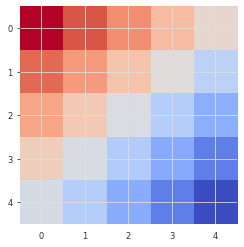

In [143]:
plt.imshow(im,cmap='coolwarm')

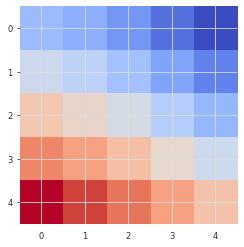

In [88]:
plt.imshow(im,cmap='coolwarm')

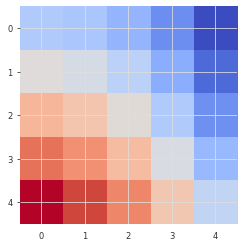

In [108]:
plt.imshow(im,cmap='coolwarm')

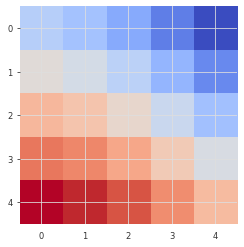

In [144]:
plt.imshow(im2, cmap='coolwarm')

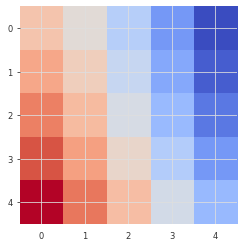

In [89]:
plt.imshow(im2, cmap='coolwarm')

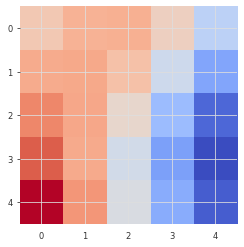

In [109]:
plt.imshow(im2, cmap='coolwarm')

In [68]:
with open('20210811_ti3_ti1212_amine.pkl', 'wb') as handle:
    pickle.dump(im, handle)